In [15]:
from fuzzy_ngram_matrix_factorization import SentimentModel

model_sumbission_1 = SentimentModel.load_from_checkpoint('lightning_logs/heavy_regularization/version_1/checkpoints/epoch=40-step=11931.ckpt', no_load_glove=False)
model_sumbission_1.eval()

SentimentModel(
  (embedding): Embedding(1500000, 300)
  (convs): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1))
    (2): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1))
    (3): Conv2d(1, 100, kernel_size=(7, 300), stride=(1, 1))
  )
  (user_embedding): Embedding(123356, 10)
  (product_embedding): Embedding(49945, 10)
  (user_product_dim_reduction): Identity()
  (user_product_pool): Identity()
  (feature_weights): Linear(in_features=822, out_features=5, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [16]:
feature_weights = model_sumbission_1.feature_weights.weight.detach().cpu().numpy()

In [17]:

text_fw, summary_fw, up_fw, helpfulness_fw, helpfulness_denom_fw = feature_weights[0][:4*100], feature_weights[0][4*100:8*100], feature_weights[0][8*100:8*100 + 80], feature_weights[0][-2], feature_weights[0][-1]

In [71]:
sorted_indices = text_fw.argsort()[::-1]
text_fw[sorted_indices]

array([ 2.08519176e-01,  2.01038763e-01,  1.96641847e-01,  1.83364213e-01,
        1.77202806e-01,  1.76715881e-01,  1.67529121e-01,  1.64153859e-01,
        1.59651205e-01,  1.59282699e-01,  1.58006996e-01,  1.55031160e-01,
        1.54886097e-01,  1.54184327e-01,  1.52422860e-01,  1.52201429e-01,
        1.50867730e-01,  1.48325041e-01,  1.46008089e-01,  1.45593897e-01,
        1.45204201e-01,  1.44942328e-01,  1.42413169e-01,  1.42063692e-01,
        1.37092844e-01,  1.36286467e-01,  1.36244357e-01,  1.35232121e-01,
        1.34596780e-01,  1.33399159e-01,  1.33215636e-01,  1.33165166e-01,
        1.33117154e-01,  1.32486403e-01,  1.31994396e-01,  1.31253555e-01,
        1.30869970e-01,  1.30576476e-01,  1.29455283e-01,  1.28310263e-01,
        1.28293812e-01,  1.27399310e-01,  1.24715105e-01,  1.22966632e-01,
        1.22345619e-01,  1.20599657e-01,  1.20556153e-01,  1.18127458e-01,
        1.16961800e-01,  1.15069330e-01,  1.14711039e-01,  1.14662930e-01,
        1.14373572e-01,  

In [19]:
n_grams = {i: model_sumbission_1.convs[i].weight.detach().cpu().numpy() for i, n in enumerate((3, 4, 5, 7))}

In [75]:
n_grams[sorted_indices[0] // 100][sorted_indices[0] % 100]

array([[[-0.40900218,  0.07421184,  0.042943  , ...,  0.06558585,
         -0.29589185, -0.04214805],
        [-0.27780217, -0.13951246,  0.083387  , ...,  0.06304213,
         -0.08917613,  0.10768304],
        [-0.11941864, -0.1831243 ,  0.13226025, ..., -0.09229309,
          0.09359195,  0.01613582],
        ...,
        [ 0.05315175, -0.01614307, -0.02691207, ...,  0.07517292,
          0.05115258, -0.03860455],
        [-0.11536324,  0.07013026, -0.18105823, ...,  0.07136648,
          0.0453283 ,  0.16452259],
        [ 0.02788864,  0.12612268, -0.06470603, ...,  0.2352548 ,
          0.06361507,  0.01170862]]], dtype=float32)

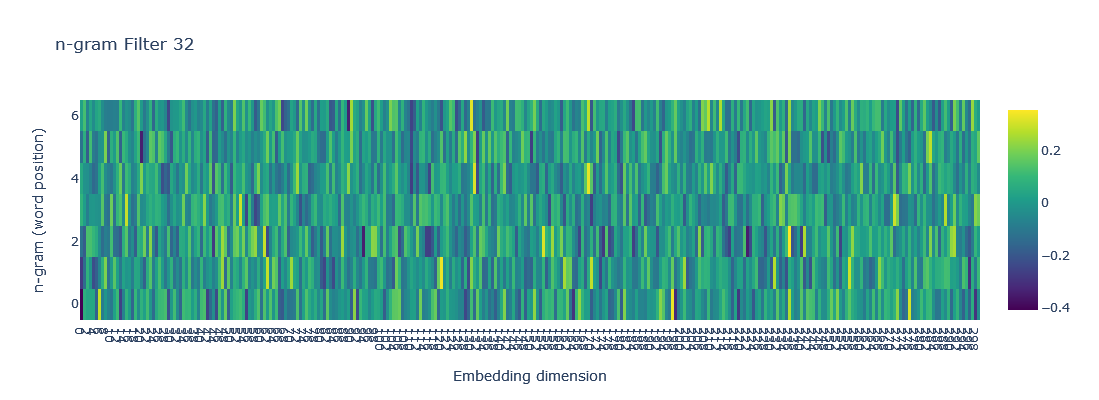

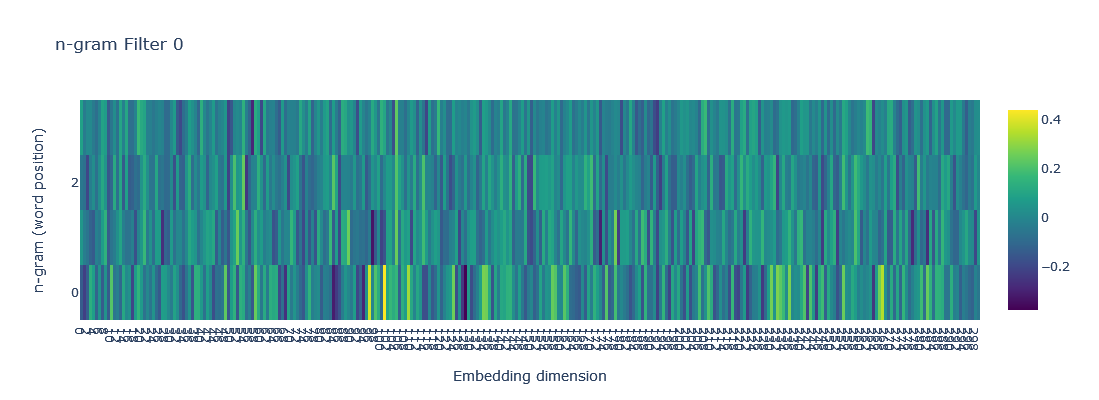

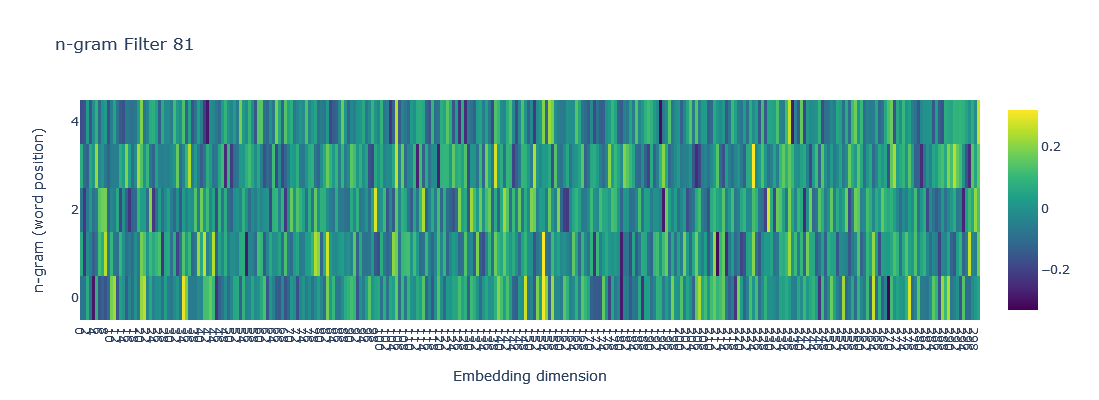

In [77]:
import plotly.graph_objects as go

def visualize_n_gram_plotly(n_gram_weights, filter_index=0):
    """
    Visualizes a single n-gram filter weight matrix from a convolutional layer using Plotly.

    Args:
        n_gram_weights (numpy.ndarray): The n-gram weights, shape (filters, 1, n, embedding_dim).
        filter_index (int): The index of the filter to visualize (default is 0).

    Returns:
        None
    """
    # Extract the weights of the specified filter
    filter_weights = n_gram_weights[filter_index].squeeze()  # shape: (n, embedding_dim)
    
    # Reshape the filter into a 2D matrix (n x embedding_dim)
    reshaped_weights = filter_weights.reshape(filter_weights.shape[0], filter_weights.shape[1])
    
    # Create a heatmap without interpolation
    fig = go.Figure(data=go.Heatmap(
        z=reshaped_weights,
        colorscale='Viridis',
        showscale=True,
        zmin=reshaped_weights.min(),  # Set the color scale to match the data range
        zmax=reshaped_weights.max()
    ))
    
    # Update layout for better visualization
    fig.update_layout(
        title=f'n-gram Filter {filter_index}',
        xaxis_title="Embedding dimension",
        yaxis_title="n-gram (word position)",
        xaxis_nticks=reshaped_weights.shape[1],
        yaxis_nticks=reshaped_weights.shape[0],
        width=800,
        height=400
    )
    
    # Show the figure
    fig.show()

for top_idx in sorted_indices[:3]:
    visualize_n_gram_plotly(n_grams[top_idx // 100], filter_index=top_idx % 100)


In [78]:
model_submission_1 = model_sumbission_1  # typo lol

In [79]:
from preprocess_data import get_glove_vocab

# Get GloVe vocabulary
glove_vocab = get_glove_vocab()


In [92]:
top_text_feature = sorted_indices[1] % 100  # 0 is just a string of curse words; let's not have that
size_idx = top_text_feature_size = sorted_indices[1] // 100
filter_sizes = [3, 4, 5, 7]
embedding_dim = 300

In [93]:
filter_weights = n_grams[top_text_feature_size][top_text_feature].squeeze(0)
filter_weights

array([[-0.13705403, -0.22183488, -0.1296175 , ..., -0.1183586 ,
        -0.01171681, -0.05161127],
       [ 0.05484276, -0.02809126, -0.05697116, ...,  0.01254423,
        -0.19752248,  0.05117292],
       [-0.04587623, -0.07293314, -0.198681  , ..., -0.06438424,
         0.06371567,  0.00373999],
       [ 0.08773524, -0.03713848,  0.01090598, ..., -0.0437373 ,
         0.02372871,  0.02650536]], dtype=float32)

In [84]:
glove_embeddings = model_submission_1.embedding.weight.detach().cpu().numpy()
M = 100000
glove_embeddings = glove_embeddings[:M]
first_M_keys = list(glove_vocab.keys())[:M]
glove_vocab = {k: glove_vocab[k] for k in first_M_keys}
idx_to_word = {idx: word for idx, word in enumerate(glove_vocab)}

In [85]:
glove_embedding_norms = np.linalg.norm(glove_embeddings, axis=1)
glove_embedding_norms

array([5.094723 , 4.9316354, 4.70935  , ..., 7.7608194, 7.820276 ,
       7.0870533], dtype=float32)

In [110]:
K = 100  # Number of top words to consider at each position
filter_size = filter_sizes[size_idx]

# Precompute the norms of the filter weights for cosine similarity
filter_weight_norms = np.linalg.norm(filter_weights, axis=1)  # Shape: (filter_size,)

# For each position, find the top K closest words
top_k_words_per_position = []
for position in range(filter_size):
    filter_vector = filter_weights[position]  # Shape: (embedding_dim,)
    norm = filter_weight_norms[position] + 1e-8  # Avoid division by zero

    # Compute cosine similarity with all word embeddings
    cos_similarities = np.dot(glove_embeddings, filter_vector) / (glove_embedding_norms * norm)
    
    # Get top K words
    top_k_indices = np.argsort(cos_similarities)[-K:]  # Indices of top K words
    top_k_words = [idx_to_word[idx] for idx in top_k_indices]
    top_k_words_per_position.append(top_k_words)

In [113]:
top_k_words_per_position

[['Personals',
  'Passwords',
  'Drip',
  'Cosmo',
  'Desi',
  'Wedges',
  'Milli',
  'Dip',
  'Americano',
  'Technics',
  'Disco',
  'Adpost.com',
  'Strips',
  'Leaks',
  'OFFERED',
  'Striped',
  'Fronts',
  'Date.com',
  'Thome',
  'Probe',
  'Fermi',
  'E-mails',
  'Glitches',
  '2-Piece',
  'Detecting',
  'Styler',
  'tolerated',
  'Labs',
  'Ads',
  'Ti',
  'Virtually',
  'Cd',
  'Albino',
  'CIALIS',
  'Statistically',
  'Emails',
  'off-topic',
  'IOP',
  'Simultaneous',
  'Plots',
  'Correcting',
  'Bootleg',
  'Identical',
  'For',
  'Truffles',
  'Asymmetrical',
  'Hacked',
  'Pops',
  'Wafer',
  'Pave',
  'Elevated',
  'Spiked',
  'Detected',
  'Spot',
  'Proofs',
  'Ie',
  'Convex',
  'Exists',
  'Zim',
  'Warns',
  'Ombre',
  'Previously',
  'NSFW',
  'Ii',
  'Probes',
  'Microwaves',
  'Flirt',
  'Duet',
  'Elongated',
  'Even',
  'green-lined',
  'Flavored',
  'Spikes',
  'BOGO',
  'undetectable',
  'Two',
  'Punto',
  'Exclusives',
  'Crossdressing',
  'Unreleased',


IndexError: list index out of range